The purpose of this dataset is to diagnose whether or not a patient is diabetic, on the basis of certain diagnostic measures in the dataset.

Dataset=Pima Indian Diabetes Dataset

In [1]:
#KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
filename=("/content/drive/MyDrive/pima-indians-diabetes.data.csv")
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
knn_df=read_csv(filename,names=names)

In [4]:
array=knn_df.values
X=array[:,0:8]
Y=array[:,8]

In [5]:
num_folds=10
kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=14)
result=cross_val_score(model,X,Y,cv=kfold)


In [6]:
result

array([0.71428571, 0.81818182, 0.68831169, 0.64935065, 0.77922078,
       0.76623377, 0.80519481, 0.85714286, 0.75      , 0.73684211])

In [7]:
result.mean()*100.0

75.64764183185235

Grid Search for Algorithm Tuning

In [8]:
#Grid search for algorithm tuning
from pandas import read_csv
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
filename=('/content/drive/MyDrive/pima-indians-diabetes.data.csv')
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
grid_df=read_csv(filename,names=names)
array=grid_df.values
X=array[:,0:8]
Y=array[:,8]

In [10]:
n_neighbors=np.array(range(1,41))
param_grid=dict(n_neighbors=n_neighbors)

In [11]:
model=KNeighborsClassifier()
grid=GridSearchCV(model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


Visualizing the CV result


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#choose K between 1 to 41
k_range=range(1,41)
k_score=[]
#Use iteration to calculate k in models
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X,Y,cv=5)
  k_score.append(scores.mean())


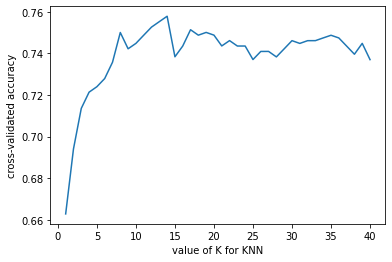

In [16]:
#plot to see clearly
plt.plot(k_range,k_score)
plt.xlabel("value of K for KNN")
plt.ylabel("cross-validated accuracy")
plt.show()